<a href="https://colab.research.google.com/github/guilhermer1/mvp_AnaliseDeDados/blob/main/An%C3%A1lise_de_Dados_e_Boas_Pr%C3%A1ticas-LaLiga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Guilherme Mendes Ribeiro

**Matrícula:** 4052025000053

**Dataset:** [LaLiga Matches Dataset (2019-2025, FBref)](https://www.kaggle.com/datasets/marcelbiezunski/laliga-matches-dataset-2019-2025-fbref)

# Descrição do Problema

O Dataset escolhido é o LaLiga Matches Dataset (2019-2025, FBref), se trata de um conjunto de dados sobre resultados de partidas que ocorreram na primeira divisão da La Liga (Liga espanhola de Futebol). O objetivo é analisar resultados e performances dos times de 2019 a 2025 e verificar se há a possibilidade de prever resultados comparando os dados históricos de diversos times ao logo desses anos.


## Hipóteses do Problema

As hipóteses que tracei são as seguintes:

- Existe uma correlação entre a maior posse de bola e a vitória em partidas?

- A posse de bola se traduz em Chutes a gol e por consequência gols?

- Os jogos fora de casa tem relação direta com as derrotas?

## Tipo de Problema

Considerando o problema apresentado e os dados e características presentes no dataset, este é um problema de **classificação supervisionada**. O objetivo é avaliar a relação entre as características (posse de bola, Chutes, chutes ao gol, local, clube, oponente e resultado) e verificar a possibilidade de uma possível análise preditiva de vitórias com base nesses dados.

## Seleção de Dados

O dataset escolhido é um conjunto de dados coletados utilizando Web Scraping no site FBref.com que traz estatísticas de jogadores e times, além das ligas em geral. As características necessárias para o estudo já estão presentes no dataset, desta forma, não foi necessário uma etapa de seleção de dados externa.


## Atributos do Dataset

O dataset contém 4318 amostras (resultados e estatísticas das partidas ao longo de 2019 a 2025), classificados em Times, resultado e Local, possuindo até 24 atributos, no entanto, o estudo será focado em 6 atributos:

- ***venue*** (local: Away (Partida fora de casa), Home (Partida em casa))
- ***result*** (resultado: W (vitória), L (derrota), D (empate))
- ***gf*** (gols_feitos)
- ***poss*** (posse_de_bola)
- ***sh*** (chutes)
- ***sot*** (Chutes_ao_gol)
- ***team*** (Clube: Barcelona, Atletico Madrid, Real Madrid, Athletic Club, Villarreal, Real Betis, Rayo Vallecano, Mallorca, Real Sociedad, Celta Vigo, Osasuna, Sevilla, Girona, Getafe, Espanyol, Leganes, Las Palmas, Valencia, Alaves, Valladolid, Cadiz, Almeria, Granada, Elche, Levante, Huesca, Eibar)

# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset.

In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import minmax_scale
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [232]:
# carregamento do dataset (O link direciona a um raw do dataset)
url = 'https://raw.githubusercontent.com/guilhermer1/mvp_AnaliseDeDados/refs/heads/main/matches_full.csv'


# Alterando as labels dos atributos do dataset, para facilitar a visualização
labels_atributos = ['indice', 'data','horario', 'competicao', 'rodada', 'dia_da_semana', 'local', 'resultado', 'gols_feitos', 'gols_sofridos', 'oponente', 'chance_de_marcar', 'chance_de_sofrer_gol',
                    'posse_de_bola', 'publico_presente', 'capitao', 'formacao', 'formacao_oponente', 'arbitro', 'report', 'notas', 'chutes', 'chutes_ao_gol', 'distancia_media_dos_chutes', 'chutes-livres',
                    'pk', 'pkatt', 'temporada', 'clube']

## Uma vez que os dados vão ser lidos diretamente de um CSV, o dataset já é um dataframe.
laligaInicial = pd.read_csv(url,  names=labels_atributos)

# Criando uma cópia de segurança do dataset.
laliga = laligaInicial

## Excluindo a primeira linha, uma vez que mudei os labels das colunas, os anteriores criaram uma nova linha, por essa razão foi necessário apagar a primeira linha.
laliga = laliga.drop(index=0)

laliga.head()



,indice,data,horario,competicao,rodada,dia_da_semana,local,resultado,gols_feitos,gols_sofridos,...,report,notas,chutes,chutes_ao_gol,distancia_media_dos_chutes,chutes-livres,pk,pkatt,temporada,clube
1,0.0,2024-08-17,21:30,La Liga,Matchweek 1,Sat,Away,W,2.0,1.0,...,Match Report,NaN,17.0,5.0,18.6,1.0,1,1,2025,Barcelona
2,1.0,2024-08-24,19:00,La Liga,Matchweek 2,Sat,Home,W,2.0,1.0,...,Match Report,NaN,13.0,5.0,16.6,0.0,0,0,2025,Barcelona
3,2.0,2024-08-27,21:30,La Liga,Matchweek 3,Tue,Away,W,2.0,1.0,...,Match Report,NaN,22.0,5.0,19.3,1.0,0,0,2025,Barcelona
4,3.0,2024-08-31,17:00,La Liga,Matchweek 4,Sat,Home,W,7.0,0.0,...,Match Report,NaN,23.0,11.0,13.7,1.0,0,0,2025,Barcelona
5,4.0,2024-09-15,16:15,La Liga,Matchweek 5,Sun,Away,W,4.0,1.0,...,Match Report,NaN,20.0,9.0,19.1,0.0,0,0,2025,Barcelona


# Análise de Dados

Durante esta etapa, vamos entender melhor a distribuição e relação entre as características das variáveis presentes no dataset, além de identificar possíveis tratamentos que deverão ser feitos na etapa de pré-processamento.

## Total e Tipo das Instâncias

O dataset possui ***4318*** instâncias (partidas), divididas entre os 27 clubes presentes na coluna ***'clube'***, possui diversas características, no entanto, vamos focar em alguns específicos:

- ***venue*** (local: Away (Partida fora de casa), Home (Partida em casa)) ***(categórico)***
- ***result*** (resultado: W (vitória), L (derrota), D (empate)) ***(categórico)***
- ***gf*** (gols_feitos) ***(float)***
- ***ga*** (gols_sofridos) ***(float)***
- ***poss*** (posse_de_bola) ***(float)***
- ***sh*** (chutes) ***(float)***
- ***sot*** (Chutes_ao_gol) ***(float)***
- ***team*** (Clube: Barcelona, Atletico Madrid, Real Madrid, Athletic Club, Villarreal, Real Betis, Rayo Vallecano, Mallorca, Real Sociedad, Celta Vigo, Osasuna, Sevilla, Girona, Getafe, Espanyol, Leganes, Las Palmas, Valencia, Alaves, Valladolid, Cadiz, Almeria, Granada, Elche, Levante, Huesca, Eibar) ***(categórico)***

In [233]:
print(f"Total de instâncias: {len(laliga)}")
print("\nTipos de dados por coluna:")
print(laliga.info())

Total de instâncias: 4318

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4318 entries, 1 to 4318
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   indice                      4318 non-null   float64
 1   data                        4318 non-null   object 
 2   horario                     4318 non-null   object 
 3   competicao                  4318 non-null   object 
 4   rodada                      4318 non-null   object 
 5   dia_da_semana               4318 non-null   object 
 6   local                       4318 non-null   object 
 7   resultado                   4318 non-null   object 
 8   gols_feitos                 4318 non-null   object 
 9   gols_sofridos               4318 non-null   object 
 10  oponente                    4318 non-null   object 
 11  chance_de_marcar            4318 non-null   object 
 12  chance_de_sofrer_gol        4318 non

###Verficação dos tipos de variáveis

Com base nos dados visualizados no dataset e na informação obtida na vizualização acima, foi possível observar que algumas colunas vieram com os tipos errados, por exemplo, a coluna ***possse_de_bola*** onde encontramos valores como ***63.0***, que deveriam ser do tipo ***float***, foram lidos pela ferramenta como tipo ***object*** e desta maneira não poderemos calcular as médias, desvio padrão e etc.

Por essa razão será necessário fazer a alteração dos tipos de dados presentes nas colunas abaixo:

- ***gols_feitos***: object para ***float***
- ***gols_sofridos***: object para ***float***
- ***posse_de_bola***: object para ***float***
- ***chutes***: object para ***float***
- ***Chutes_ao_gol***: object para ***float***



In [234]:
#Alterando os tipos necessários nas colunas que apresentam valores do tipo float.
laliga['gols_feitos'] = pd.to_numeric(laliga['gols_feitos'], errors='coerce')
laliga['gols_sofridos'] = pd.to_numeric(laliga['gols_sofridos'], errors='coerce')
laliga['chance_de_marcar'] = pd.to_numeric(laliga['chance_de_marcar'], errors='coerce')
laliga['chance_de_sofrer_gol'] = pd.to_numeric(laliga['chance_de_sofrer_gol'], errors='coerce')
laliga['posse_de_bola'] = pd.to_numeric(laliga['posse_de_bola'], errors='coerce')
laliga['chutes'] = pd.to_numeric(laliga['chutes'], errors='coerce')
laliga['chutes_ao_gol'] = pd.to_numeric(laliga['chutes_ao_gol'], errors='coerce')
laliga['distancia_media_dos_chutes'] = pd.to_numeric(laliga['distancia_media_dos_chutes'], errors='coerce')
laliga['chutes-livres'] = pd.to_numeric(laliga['chutes-livres'], errors='coerce')
laliga['pk'] = pd.to_numeric(laliga['pk'], errors='coerce')
laliga['pkatt'] = pd.to_numeric(laliga['pkatt'], errors='coerce')

# Demonstrando novamente o tipo, para a verificação real da alteração.
print(laliga.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4318 entries, 1 to 4318
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   indice                      4318 non-null   float64
 1   data                        4318 non-null   object 
 2   horario                     4318 non-null   object 
 3   competicao                  4318 non-null   object 
 4   rodada                      4318 non-null   object 
 5   dia_da_semana               4318 non-null   object 
 6   local                       4318 non-null   object 
 7   resultado                   4318 non-null   object 
 8   gols_feitos                 4318 non-null   float64
 9   gols_sofridos               4318 non-null   float64
 10  oponente                    4318 non-null   object 
 11  chance_de_marcar            4318 non-null   float64
 12  chance_de_sofrer_gol        4318 non-null   float64
 13  posse_de_bola               4318 

Podemos observar que as características que deveriam ser do tipo float foram alteradas.

In [235]:
laliga[['gols_feitos', 'gols_sofridos', 'chance_de_marcar', 'chance_de_sofrer_gol', 'posse_de_bola', 'chutes', 'chutes_ao_gol', 'distancia_media_dos_chutes', 'chutes-livres', 'pk', 'pkatt']]

,gols_feitos,gols_sofridos,chance_de_marcar,chance_de_sofrer_gol,posse_de_bola,chutes,chutes_ao_gol,distancia_media_dos_chutes,chutes-livres,pk,pkatt
1,2.0,1.0,3.2,1.0,63.0,17.0,5.0,18.6,1.0,1,1
2,2.0,1.0,1.8,1.0,64.0,13.0,5.0,16.6,0.0,0,0
3,2.0,1.0,1.4,0.4,64.0,22.0,5.0,19.3,1.0,0,0
4,7.0,0.0,4.7,0.5,70.0,23.0,11.0,13.7,1.0,0,0
5,4.0,1.0,1.9,1.3,55.0,20.0,9.0,19.1,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4314,0.0,1.0,0.8,0.4,63.0,7.0,2.0,18.9,1.0,0,0
4315,0.0,1.0,0.9,1.0,26.0,11.0,2.0,18.1,1.0,0,0
4316,0.0,2.0,0.7,2.0,72.0,14.0,3.0,20.8,3.0,0,0
4317,0.0,1.0,1.3,1.4,52.0,18.0,6.0,21.3,3.0,0,0


###Removendo Nulos

In [236]:
#Verificação de possíveis Nulos.
print("Verificando valores nulos em cada coluna:")
print(laliga.isnull().sum())

laliga.head()


Verificando valores nulos em cada coluna:
indice                           0
data                             0
horario                          0
competicao                       0
rodada                           0
dia_da_semana                    0
local                            0
resultado                        0
gols_feitos                      0
gols_sofridos                    0
oponente                         0
chance_de_marcar                 0
chance_de_sofrer_gol             0
posse_de_bola                    0
publico_presente               974
capitao                          0
formacao                         0
formacao_oponente                0
arbitro                         54
report                           0
notas                         4318
chutes                           0
chutes_ao_gol                    0
distancia_media_dos_chutes       3
chutes-livres                    0
pk                               0
pkatt                            0
temporada    

,indice,data,horario,competicao,rodada,dia_da_semana,local,resultado,gols_feitos,gols_sofridos,...,report,notas,chutes,chutes_ao_gol,distancia_media_dos_chutes,chutes-livres,pk,pkatt,temporada,clube
1,0.0,2024-08-17,21:30,La Liga,Matchweek 1,Sat,Away,W,2.0,1.0,...,Match Report,NaN,17.0,5.0,18.6,1.0,1,1,2025,Barcelona
2,1.0,2024-08-24,19:00,La Liga,Matchweek 2,Sat,Home,W,2.0,1.0,...,Match Report,NaN,13.0,5.0,16.6,0.0,0,0,2025,Barcelona
3,2.0,2024-08-27,21:30,La Liga,Matchweek 3,Tue,Away,W,2.0,1.0,...,Match Report,NaN,22.0,5.0,19.3,1.0,0,0,2025,Barcelona
4,3.0,2024-08-31,17:00,La Liga,Matchweek 4,Sat,Home,W,7.0,0.0,...,Match Report,NaN,23.0,11.0,13.7,1.0,0,0,2025,Barcelona
5,4.0,2024-09-15,16:15,La Liga,Matchweek 5,Sun,Away,W,4.0,1.0,...,Match Report,NaN,20.0,9.0,19.1,0.0,0,0,2025,Barcelona


Com os dados acima, podemos observar a presenta de nulos nas colunas ***'publico_presente'***, ***'arbitro'***, ***'notas'*** e ***'distancia_media_dos_chutes'***.

Como estas colunas não são relevantes para o estudo, vamos removê-las do dataset.

In [237]:
#Removendo as colunas 'publico_presente', 'arbitro', 'notas' e 'distancia_media_dos_chutes'.
laliga = laliga.drop(columns=['publico_presente', 'arbitro', 'notas', 'distancia_media_dos_chutes'])

print("Verificando valores nulos em cada coluna:")
print(laliga.isnull().any())

laliga.head()

Verificando valores nulos em cada coluna:
indice                  False
data                    False
horario                 False
competicao              False
rodada                  False
dia_da_semana           False
local                   False
resultado               False
gols_feitos             False
gols_sofridos           False
oponente                False
chance_de_marcar        False
chance_de_sofrer_gol    False
posse_de_bola           False
capitao                 False
formacao                False
formacao_oponente       False
report                  False
chutes                  False
chutes_ao_gol           False
chutes-livres           False
pk                      False
pkatt                   False
temporada               False
clube                   False
dtype: bool


,indice,data,horario,competicao,rodada,dia_da_semana,local,resultado,gols_feitos,gols_sofridos,...,formacao,formacao_oponente,report,chutes,chutes_ao_gol,chutes-livres,pk,pkatt,temporada,clube
1,0.0,2024-08-17,21:30,La Liga,Matchweek 1,Sat,Away,W,2.0,1.0,...,4-2-3-1,4-4-2,Match Report,17.0,5.0,1.0,1,1,2025,Barcelona
2,1.0,2024-08-24,19:00,La Liga,Matchweek 2,Sat,Home,W,2.0,1.0,...,4-2-3-1,4-2-3-1,Match Report,13.0,5.0,0.0,0,0,2025,Barcelona
3,2.0,2024-08-27,21:30,La Liga,Matchweek 3,Tue,Away,W,2.0,1.0,...,4-2-3-1,4-4-2,Match Report,22.0,5.0,1.0,0,0,2025,Barcelona
4,3.0,2024-08-31,17:00,La Liga,Matchweek 4,Sat,Home,W,7.0,0.0,...,4-3-3,4-1-4-1,Match Report,23.0,11.0,1.0,0,0,2025,Barcelona
5,4.0,2024-09-15,16:15,La Liga,Matchweek 5,Sun,Away,W,4.0,1.0,...,4-2-3-1,4-2-3-1,Match Report,20.0,9.0,0.0,0,0,2025,Barcelona


Podemos observar a partir dos dados acima, que não há mais valores nulos no dataset.

###Gráfico de barras demonstrando a quantidade de amostras por clube

Número de classificações únicas presentes na coluna 'clube': 27 

Número de amostras totais presentes no Dataset: 4318 



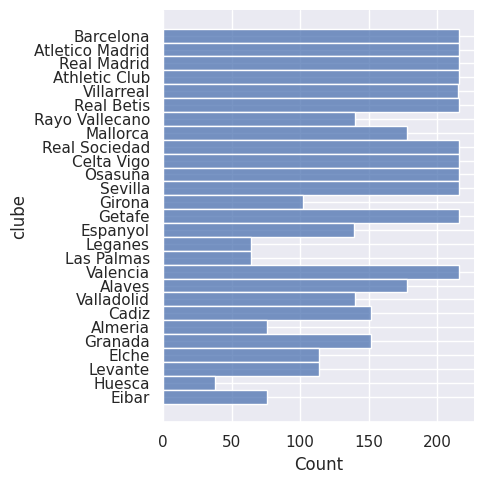

In [238]:
quantidade_de_clubes = len(pd.unique(laliga['clube']))
quantidade_de_amostras = len(laliga)

print("Número de classificações únicas presentes na coluna 'clube':", quantidade_de_clubes, '\n')
print("Número de amostras totais presentes no Dataset:", quantidade_de_amostras, '\n')

# Um gráfico de barras mostrando a contagem de amostras por Clube em todos os anos.
sns.displot(
    laliga, y="clube",
    binwidth=7, height=5, facet_kws=dict(margin_titles=True),
)

O gráfico de barras mostra a quantidade de amostras (partidas) por clube presente na coluna "clube". É possível observar a diferença de amostras quando comparamos alguns clubes com outros, analisando um clube específico (Eibar), pude apurar que a razão de alguns terem um número de jogos menor, se dá pelo fato do clube ter sido rebaixado entre os anos 2019-2025, desta forma, não participando da La liga em todos os anos do estudo.

## Estatísticas Descritivas


In [239]:
# Estatísticas descritivas básicas do dataset
laliga[['gols_feitos', 'gols_sofridos', 'posse_de_bola', 'chutes', 'chutes_ao_gol']].describe()

,gols_feitos,gols_sofridos,posse_de_bola,chutes,chutes_ao_gol
count,4318.000000,4318.000000,4318.000000,4318.000000,4318.000000
mean,1.270032,1.270032,50.001158,11.512043,3.785086
std,1.168970,1.168970,11.435318,4.838242,2.288167
min,0.000000,0.000000,18.000000,0.000000,0.000000
25%,0.000000,0.000000,42.000000,8.000000,2.000000
50%,1.000000,1.000000,50.000000,11.000000,3.000000
75%,2.000000,2.000000,58.000000,14.000000,5.000000
max,7.000000,7.000000,82.000000,36.000000,17.000000


### Média


In [240]:
# média dos atributos numéricos do dataset
laliga[['gols_feitos', 'gols_sofridos', 'posse_de_bola', 'chutes', 'chutes_ao_gol']].describe().loc['mean']

,mean
gols_feitos,1.270032
gols_sofridos,1.270032
posse_de_bola,50.001158
chutes,11.512043
chutes_ao_gol,3.785086


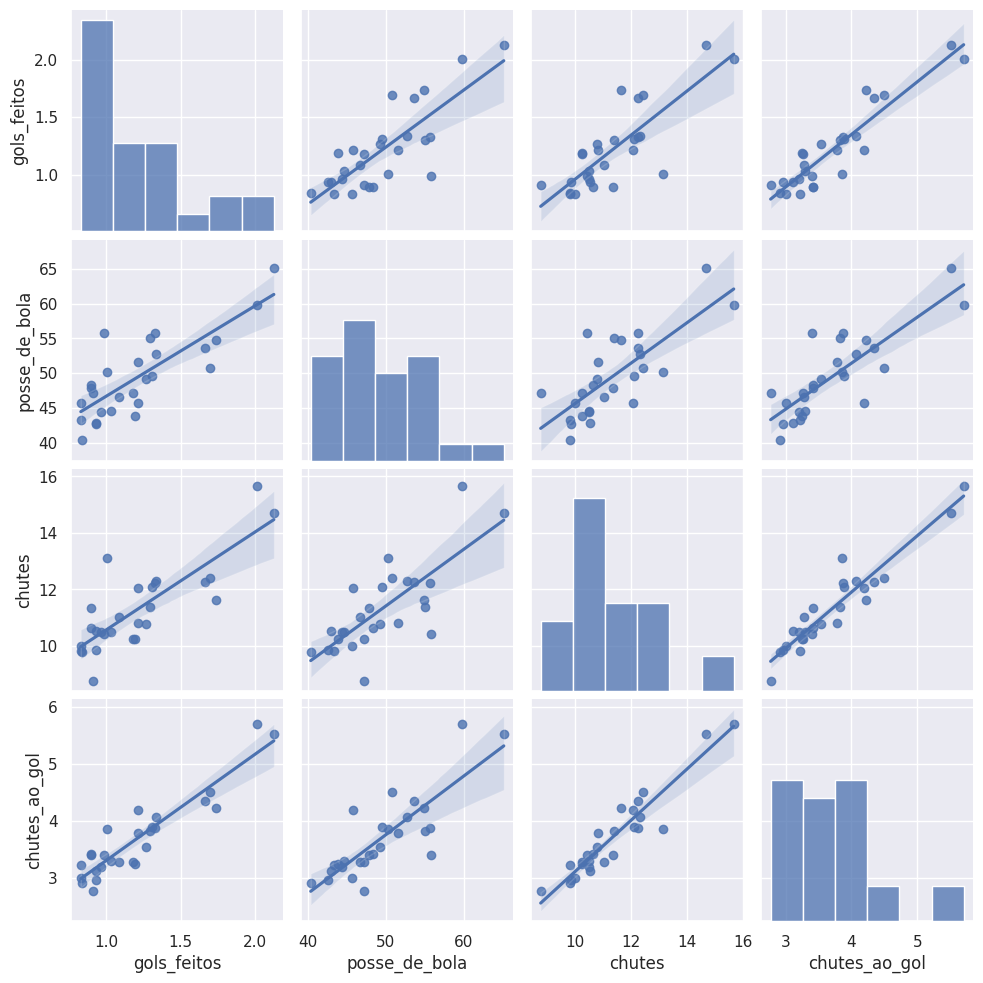

In [241]:
## médias por clube
sns.pairplot(laliga.groupby('clube')[['gols_feitos', 'posse_de_bola', 'chutes', 'chutes_ao_gol']].mean(), kind='reg');


Análisando os gráficos com as médias e comparando os resultados, podemos observar que há uma relação direta entre ***'posse_de_bola'*** e ***'chutes_ao_gol'***, ***'chutes'*** e ***'gols_feitos'***.

É possível observar que para todos os clubes, a ***'posse_de_bola'*** está diretamente ligada a quantidade de gols feitos e por consequência a vitória.

O que já é um bom indicativo para que as duas primeiras hipóteses do estudo estejam corretas.

### Desvio Padrão


In [242]:
# desvio padrão dos atributos numéricos do dataset
laliga[['gols_feitos', 'posse_de_bola', 'chutes', 'chutes_ao_gol']].describe().loc['std']

,std
gols_feitos,1.168970
posse_de_bola,11.435318
chutes,4.838242
chutes_ao_gol,2.288167


<Axes: >

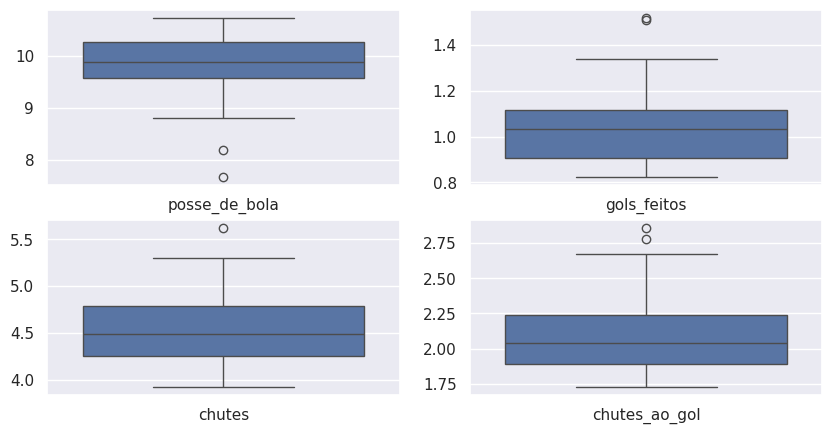

In [243]:
### BOXPLOT dos desvios padrão por clube
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

desvio_gols_feitos = laliga.groupby('clube')[['gols_feitos']].std();
desvio_posse_de_bola = laliga.groupby('clube')[['posse_de_bola']].std();
desvio_chutes = laliga.groupby('clube')[['chutes']].std();
desvio_chutes_ao_gol = laliga.groupby('clube')[[ 'chutes_ao_gol']].std();

sns.boxplot(data=desvio_posse_de_bola, ax=axes[0,0])
sns.boxplot(data=desvio_gols_feitos, ax=axes[0,1])
sns.boxplot(data=desvio_chutes, ax=axes[1,0])
sns.boxplot(data=desvio_chutes_ao_gol, ax=axes[1,1])

Observando os gráficos acima, podemos observar a presença de alguns outliers com os dados de alguns clubes, no entanto, estes outliers são números reais, que podem comprovar as duas primeiras hipóteses, há partidas onde a ***'posse_de_bola'*** de um clube foi muito maior que a do oponente e por essa razão os números de ***'chutes'***, ***'chutes_ao_gol'***, e ***'gols_feitos'*** foram discrepantes em relação ao do adversário.

Os números abaixo representam a partida com a maior posse de bola presente no Dataset.


In [244]:
# Selecionando a linha com o maior número de 'posse_de_bola' presente no dataset.
maior_posse_de_bola = laliga.sort_values(by='posse_de_bola', ascending=False).head()

maior_posse_de_bola[['resultado', 'posse_de_bola', 'chutes', 'chutes_ao_gol', 'gols_feitos', 'gols_sofridos', 'clube']]


,resultado,posse_de_bola,chutes,chutes_ao_gol,gols_feitos,gols_sofridos,clube
2056,D,82.0,36.0,9.0,0.0,0.0,Real Madrid
2884,L,82.0,21.0,8.0,1.0,2.0,Barcelona
3616,W,81.0,18.0,6.0,1.0,0.0,Barcelona
2907,L,81.0,16.0,4.0,1.0,2.0,Barcelona
2897,D,81.0,19.0,3.0,1.0,1.0,Barcelona


Como pudemos observar acima, uma maior ***'posse_de_bola'*** gerou maior quantidaded de ***'chutes'*** e ***'chutes_ao_gol'***, ainda que estes chutes não tenham se convertido em ***'gols_feitos'***, a ***'posse_de_bola***' gerou discrepância nas chances criadas.

## Histograma

### Histograma dos atributos

Com base nos principais atributos, observaremos os histogramas em busca de possíveis discrepâncias.

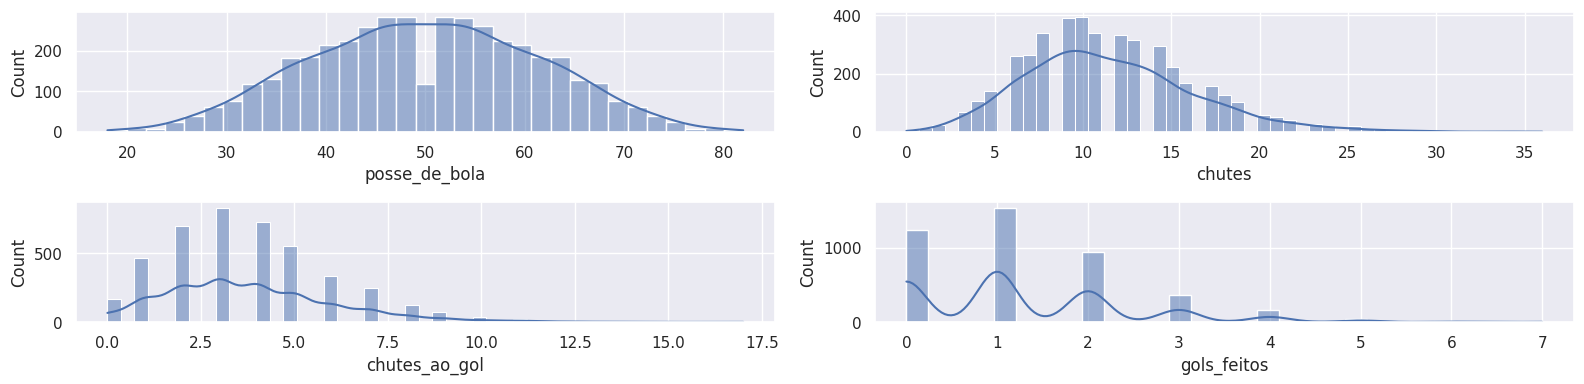

In [266]:
#Histograma 'posse_de_bola', 'chutes', 'chutes_ao_gol', 'gols_f
fig, axes = plt.subplots(2,2 ,figsize=(16, 4))

sns.histplot(laliga['posse_de_bola'], kde=True, ax=axes[0,0])
sns.histplot(laliga['chutes'], kde=True, ax=axes[0,1])
sns.histplot(laliga['chutes_ao_gol'], kde=True, ax=axes[1,0])
sns.histplot(laliga['gols_feitos'], kde=True, ax=axes[1,1])

plt.tight_layout()


Com base nos gráficos acima podemos observar valores dentro do esperado, não foi possível identificar outliers que precisem ser tratados de forma imediata.

Deixando assim este tratamento para a normalização durante o pré-processamento.

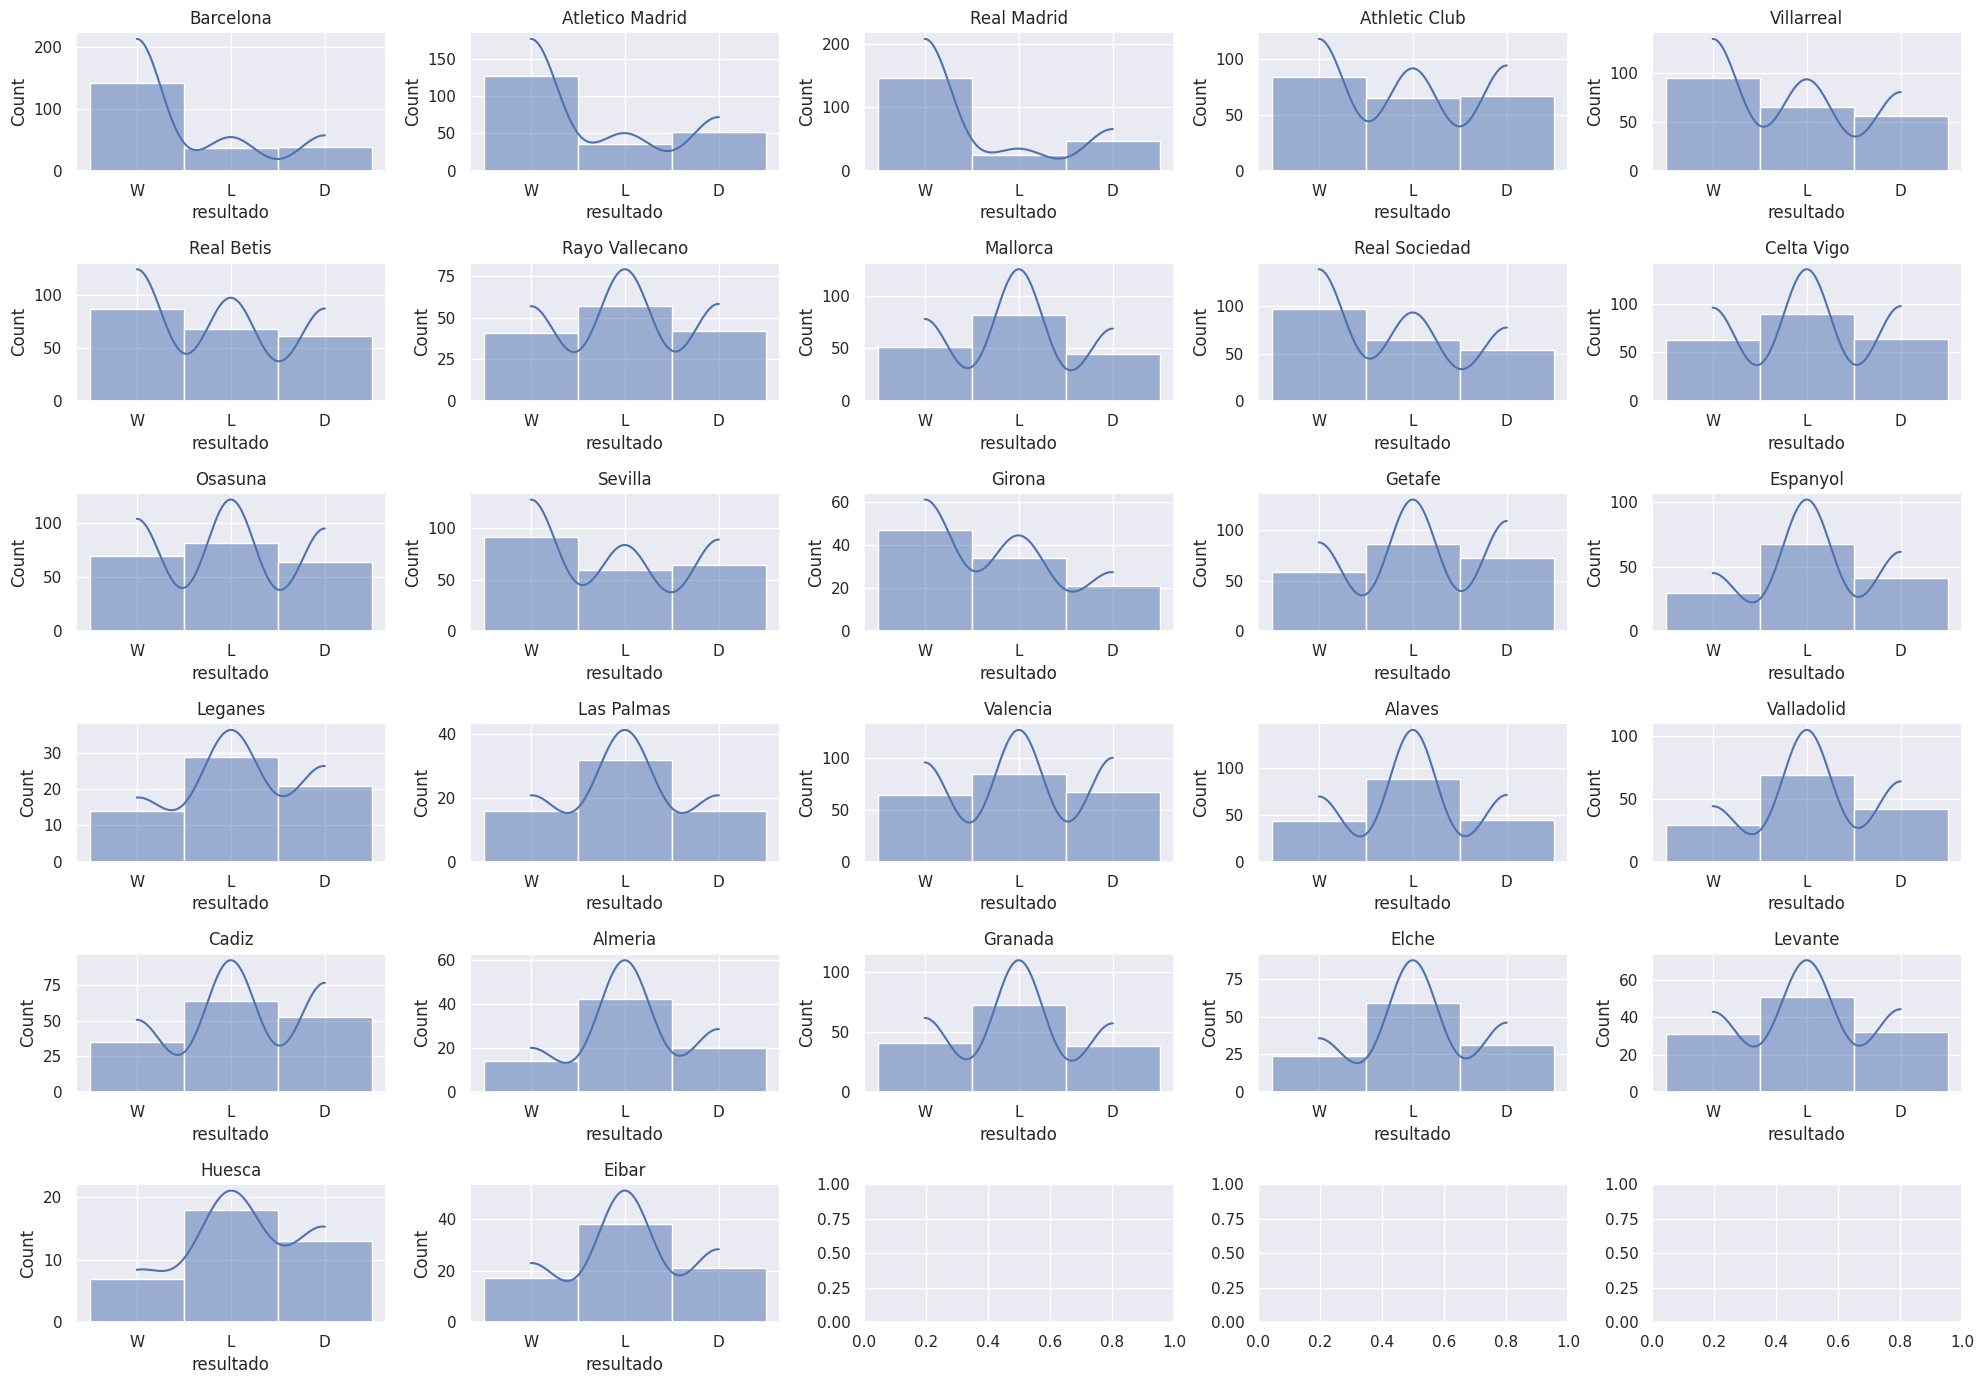

In [245]:
# histograma de resultados por clubes
fig, axes = plt.subplots(6, 5, figsize=(20, 14))

clubes = pd.unique(laliga['clube'])

i = 0
j = 0

for clube in clubes:

  laligaClube = laliga[laliga['clube'] == clube]

  laligaClube = pd.DataFrame(laligaClube)

  laligaClube = laligaClube.sort_values(by='resultado', ascending=False)

  sns.histplot(data=laligaClube, x="resultado", kde=True, ax=axes[i,j], legend=True, hue_order=['W','D','L']).set_title(clube)

  plt.tight_layout()

  if j == 4:
    i = i+1
    j = 0
  else:
    j = j+1

O Histograma acima demonstra os resultados divididos por clubes presentes no Dataset, a partir desse gráfico selecionei 3 clubes para fazermos um estudo mais profundo ***(Barcelona, Celta de vigo e Athletic Club)***, esses três representam respectivamente um clube predominante que ganha com frequência o campeonato, um clube do meio da tabela e um clube que geralmente fica abaixo do meio da tabela.

*   ***Barcelona*** - Apresenta um número muito maior de vitórias.
*   ***Athletic Club*** - Apresenta um número equilibrado entre vitórias, derrotas e empates.
*   ***Celta de vigo*** - Apresenta um número maior de derrotas.

### Análise dos Clubes Selecionados (Barcelona, Athletic Club e Celta de Vigo)



#### Descrição dos dados de cada Clube:



#####   Barcelona

In [246]:
#Descrição de dados por Coluna - Barcelona.
laligaBarcelona = laliga[laliga['clube'] == 'Barcelona']

#Contando o número de Vitórias W, presente na coluna resultado para o time Barcelona e porcentagem.
vitorias = len(laligaBarcelona[laligaBarcelona['resultado'] == 'W'])
porcentagem_de_vitoria = np.round((vitorias/len(laligaBarcelona))*100, decimals=2)

print('Número de vitórias: '+ str(vitorias))
print('Porcentagem de vitórias: '+ str(porcentagem_de_vitoria) +'\n')

#Contando o número de Empates D, presente na coluna resultado para o time Barcelona e porcentagem.
empates = len(laligaBarcelona[laligaBarcelona['resultado'] == 'D'])
porcentagem_de_empates = np.round((empates/len(laligaBarcelona))*100, decimals=2)

print('Número de empates: '+ str(empates))
print('Porcentagem de empates: '+ str(porcentagem_de_empates) +'\n')

#Contando o número de Derrotas L, presente na coluna resultado para o time Barcelona e porcentagem.
derrotas = len(laligaBarcelona[laligaBarcelona['resultado'] == 'L'])
porcentagem_de_derrotas = np.round((derrotas/len(laligaBarcelona))*100, decimals=2)

print('Número de derrotas: '+ str(derrotas))
print('Porcentagem de derrotas: '+ str(porcentagem_de_derrotas) +'\n')

laligaBarcelona.describe()

Número de vitórias: 142
Porcentagem de vitórias: 65.74

Número de empates: 38
Porcentagem de empates: 17.59

Número de derrotas: 36
Porcentagem de derrotas: 16.67



,indice,gols_feitos,gols_sofridos,chance_de_marcar,chance_de_sofrer_gol,posse_de_bola,chutes,chutes_ao_gol,chutes-livres,pk,pkatt
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.00000,216.000000
mean,25.537037,2.125000,0.939815,1.943056,1.007407,65.162037,14.689815,5.518519,0.759259,0.12037,0.162037
std,16.052487,1.518299,1.002828,0.941374,0.619032,7.683062,5.242145,2.780268,0.958394,0.32615,0.381726
min,0.000000,0.000000,0.000000,0.200000,0.000000,45.000000,5.000000,0.000000,0.000000,0.00000,0.000000
25%,11.750000,1.000000,0.000000,1.200000,0.600000,59.750000,11.000000,4.000000,0.000000,0.00000,0.000000
50%,24.000000,2.000000,1.000000,1.800000,0.900000,65.000000,14.000000,5.000000,0.500000,0.00000,0.000000
75%,39.250000,3.000000,2.000000,2.600000,1.300000,70.000000,18.000000,7.000000,1.000000,0.00000,0.000000
max,53.000000,7.000000,5.000000,5.000000,3.400000,82.000000,33.000000,17.000000,5.000000,1.00000,2.000000


Com base nos dados apresentados acima o ***Barcelona*** possui ***216*** amostras de partidas, em média ***65%*** de posse de bola, ***14,5*** Chutes por jogo, sendo ***5,5*** chutes ao gol e venceu ***65,74%*** das partidas presentes neste dataset.

#####  Athletic Club




In [247]:
#Descrição de dados por Coluna - Athletic Club.
laligaAthletic = laliga[laliga['clube'] == 'Athletic Club']

#Contando o número de Vitórias W, presente na coluna resultado para o time Athletic Club e porcentagem.
vitorias = len(laligaAthletic[laligaAthletic['resultado'] == 'W'])
porcentagem_de_vitoria = np.round((vitorias/len(laligaAthletic))*100, decimals=2)

print('Número de vitórias: '+ str(vitorias))
print('Porcentagem de vitórias: '+ str(porcentagem_de_vitoria) +'\n')

#Contando o número de Empates D, presente na coluna resultado para o time Athletic Club e porcentagem.
empates = len(laligaAthletic[laligaAthletic['resultado'] == 'D'])
porcentagem_de_empates = np.round((empates/len(laligaAthletic))*100, decimals=2)

print('Número de empates: '+ str(empates))
print('Porcentagem de empates: '+ str(porcentagem_de_empates) +'\n')

#Contando o número de Derrotas L, presente na coluna resultado para o time Athletic Club e porcentagem.
derrotas = len(laligaAthletic[laligaAthletic['resultado'] == 'L'])
porcentagem_de_derrotas = np.round((derrotas/len(laligaAthletic))*100, decimals=2)

print('Número de derrotas: '+ str(derrotas))
print('Porcentagem de derrotas: '+ str(porcentagem_de_derrotas) +'\n')

laligaAthletic.describe()

Número de vitórias: 84
Porcentagem de vitórias: 38.89

Número de empates: 67
Porcentagem de empates: 31.02

Número de derrotas: 65
Porcentagem de derrotas: 30.09



,indice,gols_feitos,gols_sofridos,chance_de_marcar,chance_de_sofrer_gol,posse_de_bola,chutes,chutes_ao_gol,chutes-livres,pk,pkatt
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,21.125000,1.305556,1.013889,1.301852,1.052315,49.550926,12.097222,3.893519,0.305556,0.115741,0.175926
std,13.737341,1.246079,0.947355,0.824732,0.651649,9.887140,4.809370,2.404019,0.527536,0.334848,0.427621
min,0.000000,0.000000,0.000000,0.200000,0.100000,27.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.000000,0.000000,0.700000,0.600000,43.000000,8.000000,2.000000,0.000000,0.000000,0.000000
50%,19.500000,1.000000,1.000000,1.200000,0.900000,50.000000,12.000000,4.000000,0.000000,0.000000,0.000000
75%,34.000000,2.000000,1.250000,1.700000,1.300000,57.000000,15.000000,5.000000,1.000000,0.000000,0.000000
max,45.000000,7.000000,5.000000,4.600000,4.500000,72.000000,29.000000,16.000000,2.000000,2.000000,2.000000


Com base nos dados apresentados acima o ***Athletic Club*** possui ***216*** amostras de partidas, em média ***49,55%*** de posse de bola, ***12,09*** Chutes por jogo, sendo ***3,89*** chutes ao gol e venceu ***38,89%*** das partidas presentes neste dataset.

#####  Celta Vigo

In [248]:
#Descrição de dados por Coluna - Celta de vigo.
laligaCelta = laliga[laliga['clube'] == 'Celta Vigo']

#Contando o número de Vitórias W, presente na coluna resultado para o time Celta de vigo e porcentagem.
vitorias = len(laligaCelta[laligaCelta['resultado'] == 'W'])
porcentagem_de_vitoria = np.round((vitorias/len(laligaCelta))*100, decimals=2)

print('Número de vitórias: '+ str(vitorias))
print('Porcentagem de vitórias: '+ str(porcentagem_de_vitoria) +'\n')

#Contando o número de Empates D, presente na coluna resultado para o time Celta de vigo e porcentagem.
empates = len(laligaCelta[laligaCelta['resultado'] == 'D'])
porcentagem_de_empates = np.round((empates/len(laligaCelta))*100, decimals=2)

print('Número de empates: '+ str(empates))
print('Porcentagem de empates: '+ str(porcentagem_de_empates) +'\n')

#Contando o número de Derrotas L, presente na coluna resultado para o time Celta de vigo e porcentagem.
derrotas = len(laligaCelta[laligaCelta['resultado'] == 'L'])
porcentagem_de_derrotas = np.round((derrotas/len(laligaCelta))*100, decimals=2)

print('Número de derrotas: '+ str(derrotas))
print('Porcentagem de derrotas: '+ str(porcentagem_de_derrotas) +'\n')

laligaCelta.describe()

Número de vitórias: 63
Porcentagem de vitórias: 29.17

Número de empates: 64
Porcentagem de empates: 29.63

Número de derrotas: 89
Porcentagem de derrotas: 41.2



,indice,gols_feitos,gols_sofridos,chance_de_marcar,chance_de_sofrer_gol,posse_de_bola,chutes,chutes_ao_gol,chutes-livres,pk,pkatt
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,19.365741,1.212963,1.384259,1.216204,1.252778,51.560185,10.805556,3.777778,0.449074,0.120370,0.166667
std,12.036013,1.116897,1.183425,0.726102,0.773871,10.287770,4.691325,2.196544,0.680081,0.353523,0.397668
min,0.000000,0.000000,0.000000,0.100000,0.100000,26.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,8.750000,0.000000,0.000000,0.700000,0.700000,44.000000,7.750000,2.000000,0.000000,0.000000,0.000000
50%,19.000000,1.000000,1.000000,1.100000,1.100000,51.000000,10.500000,4.000000,0.000000,0.000000,0.000000
75%,29.250000,2.000000,2.000000,1.600000,1.600000,59.000000,14.000000,5.000000,1.000000,0.000000,0.000000
max,42.000000,6.000000,5.000000,4.200000,4.600000,78.000000,26.000000,13.000000,3.000000,2.000000,2.000000


Com base nos dados apresentados acima o ***Celta Vigo*** possui ***216*** amostras de partidas, em média ***51,56%*** de posse de bola, ***10,8*** Chutes por jogo, sendo ***3,7*** chutes ao gol e venceu ***29,17%*** das partidas presentes neste dataset.

#### Gráficos comparativos dos clubes selecionados

##### Comparação dos dados dos times

Text(0.5, 1.0, 'Gols Feitos x Chutes')

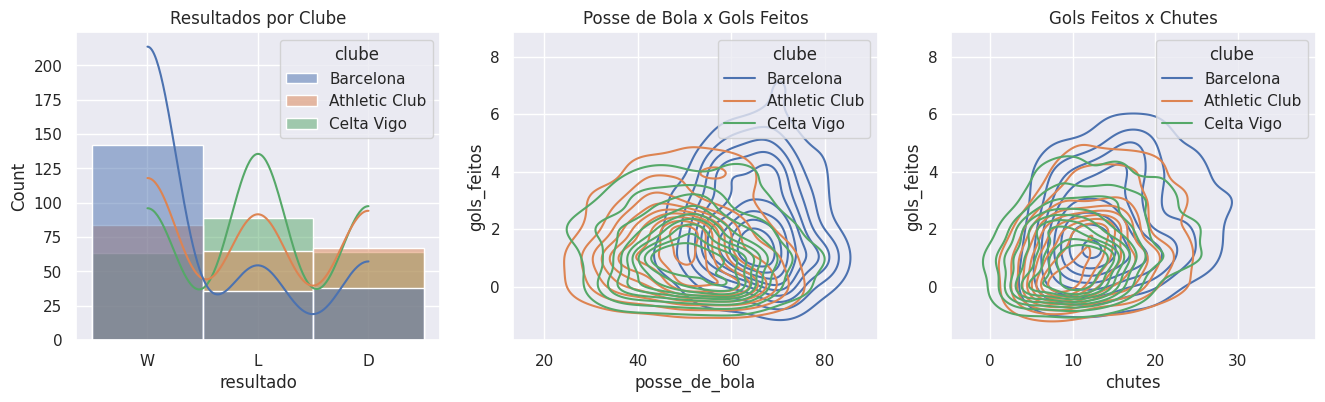

In [249]:
#Gráfico comparando as posses de bola dos três clubes selecionados
laligaPosseDeBola = laliga[laliga['clube'].isin(['Barcelona', 'Athletic Club', 'Celta Vigo'])]

fig, axes = plt.subplots(1,3 ,figsize=(16, 4))

#gráfico resultados por clube
sns.histplot(data=laligaPosseDeBola, x="resultado", legend=True, ax=axes[0], kde=True, hue='clube').set_title('Resultados por Clube')

#gráfico posse_de_bola x gols_feitos
sns.kdeplot(data=laligaPosseDeBola, x="posse_de_bola", y='gols_feitos', ax=axes[1], legend=True, hue='clube').set_title('Posse de Bola x Gols Feitos')

#gráfico posse_de_bola x gols_feitos
sns.kdeplot(data=laligaPosseDeBola, x="chutes", y='gols_feitos', ax=axes[2], legend=True, hue='clube').set_title('Gols Feitos x Chutes')


Com base nos gráficos acima, podemos observar a correlação direta entre ***'posse_de_bola'***, 'gols_feitos' e o ***'resultado'***, além disso, considerando os números dos três times, fica comprovado que a posse é de fato uma característica relevante nas partidas, podendo influenciar na vitória ou não.

Por Exemplo, o clube ***Barcelona*** possui em média ***65,14%*** de ***'posse_de_bola'*** em suas partidas, aumentando as chances criadas (***'chutes'***) e por consequência os ***'gols_feitos'***.

Já nos outros clubes (***'Athletic Club'*** e ***'Celta Vigo'***), embora a ***'posse_de_bola'*** seja próxima, há uma diferença grande na quantidade de derrotas, o que podemos observar é que mesmo que o número de chances criadas (***'chutes'***) seja parecido, há uma diferença na conversão dos lances em gols entre os dois clubes.

Abaixo faremos uma nova coluna no dataset calculando a taxa de conversão de chutes em Gol, com base nos atributos ***'chutes'*** e ***'gols_feitos'***.

In [250]:
#Criando a nova coluna, 'taxa_de_conversão' que será uma medida com base no atributo 'chute' e 'gols_feitos'.

laliga['taxa_de_conversao'] = laliga['gols_feitos'] / laliga['chutes']

laliga['taxa_de_conversao']


,taxa_de_conversao
1,0.117647
2,0.153846
3,0.090909
4,0.304348
5,0.200000
...,...
4314,0.000000
4315,0.000000
4316,0.000000
4317,0.000000


Agora, baseado na ***'taxa_de_conversao'***, vamos comparar novamente os clubes, para verificar se há uma diferença grande entre a quantidade de oportunidades que cada clube precisa para marcar.

Média de Taxa de Conversão (Barcelona): 0.15563794040541531

Média de Taxa de Conversão (Athletic Club): 0.11454554682080496

Média de Taxa de Conversão (Celta Vigo): 0.13333813043833645



Text(0.5, 1.02, 'Taxa de Conversão de Chutes em Gol por Clube')

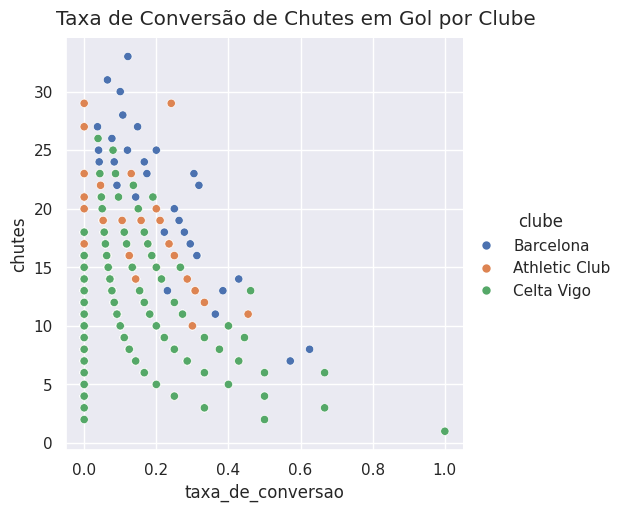

In [251]:
#Descrição de dados por Coluna - Barcelona.
laligaBarcelona = laliga[laliga['clube'] == 'Barcelona']

print('Média de Taxa de Conversão (Barcelona): ' + str(laligaBarcelona['taxa_de_conversao'].mean())+'\n')

#Descrição de dados por Coluna - Athletic Club.
laligaAthletic = laliga[laliga['clube'] == 'Athletic Club']

print('Média de Taxa de Conversão (Athletic Club): ' + str(laligaAthletic['taxa_de_conversao'].mean())+'\n')

#Descrição de dados por Coluna - Celta de vigo.
laligaCelta = laliga[laliga['clube'] == 'Celta Vigo']

print('Média de Taxa de Conversão (Celta Vigo): ' + str(laligaCelta['taxa_de_conversao'].mean())+'\n')

laliga_clubes_selecionados = pd.concat([laligaBarcelona, laligaAthletic, laligaCelta])

p = sns.relplot(data=laliga_clubes_selecionados, x="taxa_de_conversao", y="chutes", hue='clube')
p.fig.suptitle("Taxa de Conversão de Chutes em Gol por Clube", y=1.02)

Observando as médias dos clubes, vemos que a diferença de ***'taxa_de_conversao'*** é um fator decisivo para a conversão dos gols, a posse de bola geralmente se transforma em oportunidades (***'chutes'***), mas a conversão das oportunidades sempre acontece.

## Matriz de Correlação



Matriz de Correlação:



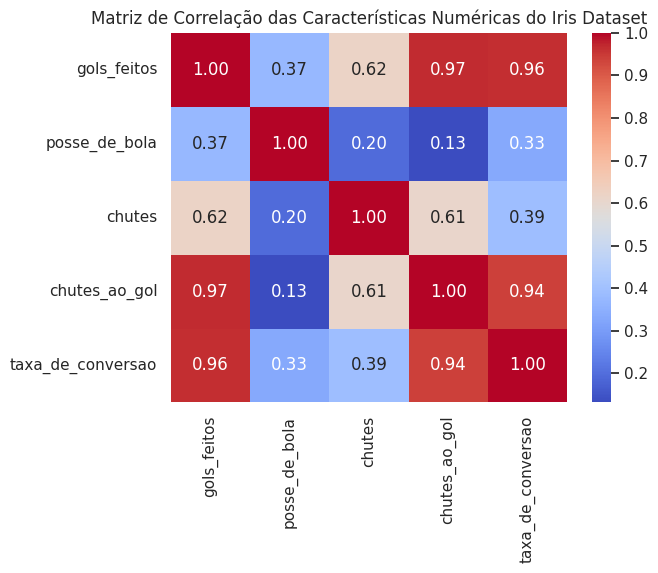

In [252]:
# Matriz de correlação
print("\nMatriz de Correlação:\n")

sns.heatmap(laliga_clubes_selecionados[['gols_feitos', 'posse_de_bola', 'chutes', 'chutes_ao_gol', 'taxa_de_conversao']].iloc[0:5].corr(), annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Matriz de Correlação das Características Numéricas do Iris Dataset')

plt.show()

A partir do mapa de correlação, podemos observar que há uma correlação entre os atributos propostos, no entanto, a relação entre ***'posse_de_bola'***  e ***'gols_feitos'*** não é tão forte quanto o esperado.



# Pré-Processamento de Dados


## Removendo Colunas que não serão úteis do Dataframe

In [253]:
#Removendo colunas 'indice', 'data','horario', 'competicao', 'rodada', 'dia_da_semana', 'oponente', 'formacao', 'formacao_oponente'

laliga = laliga.drop(columns=['indice', 'data','horario', 'competicao', 'rodada', 'dia_da_semana', 'oponente', 'formacao', 'formacao_oponente', 'capitao', 'pk', 'pkatt', 'report'])

laliga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4318 entries, 1 to 4318
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   local                 4318 non-null   object 
 1   resultado             4318 non-null   object 
 2   gols_feitos           4318 non-null   float64
 3   gols_sofridos         4318 non-null   float64
 4   chance_de_marcar      4318 non-null   float64
 5   chance_de_sofrer_gol  4318 non-null   float64
 6   posse_de_bola         4318 non-null   float64
 7   chutes                4318 non-null   float64
 8   chutes_ao_gol         4318 non-null   float64
 9   chutes-livres         4318 non-null   float64
 10  temporada             4318 non-null   object 
 11  clube                 4318 non-null   object 
 12  taxa_de_conversao     4316 non-null   float64
dtypes: float64(9), object(4)
memory usage: 438.7+ KB


## Removendo os nulos presentes na 'taxa_de_conversao'

Com base nas informações obtidas após remover as colunas acima, foi possível identificar 2 linhas com valores nulos presentes na coluna taxa_de_conversao.

Considerando a quantidade de amostras, as 2 não representam um grande número, desta forma, removeremos as linhas do Dataframe.

In [254]:
#Removendo as linhas do Dataframe

laliga.dropna(subset=['taxa_de_conversao'], inplace=True)

print(laliga.isnull().sum())

local                   0
resultado               0
gols_feitos             0
gols_sofridos           0
chance_de_marcar        0
chance_de_sofrer_gol    0
posse_de_bola           0
chutes                  0
chutes_ao_gol           0
chutes-livres           0
temporada               0
clube                   0
taxa_de_conversao       0
dtype: int64


## Dividindo o Dataset em conjuntos de treino e teste

In [255]:
# Separar features (X) e target (y)
X = laliga.drop('resultado', axis=1)
y = laliga['resultado']

In [256]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [257]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (3021, 12)
Dimensões de X_test: (1295, 12)
Dimensões de y_train: (3021,)
Dimensões de y_test: (1295,)


## Normalização

Aplicaremos a normalização para que os valores que tem escalas muito diferentes estejam mais próximos, por exemplo ***'posse_de_bola'*** e ***'gols_feitos'***.


In [258]:
# Inicializar o MinMaxScaler
scaler_norm = MinMaxScaler()

In [259]:
cols_to_norm = ['gols_feitos', 'posse_de_bola', 'chutes', 'chutes_ao_gol']

# Normalizando o Dataframe de treino
X_train_normalized = X_train
X_train_normalized[cols_to_norm] = minmax_scale(X_train_normalized[cols_to_norm])

# Normalizando o Dataframe de teste
X_test_normalized = X_test
X_test_normalized[cols_to_norm] = minmax_scale(X_test_normalized[cols_to_norm])


In [260]:
# Exibir as primeiras linhas dos dados normalizados (como DataFrame para melhor visualização)
df_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)

In [261]:
print("\nPrimeiras 5 linhas dos dados normalizados (treino):")
print(df_normalized.head())


Primeiras 5 linhas dos dados normalizados (treino):
     local  gols_feitos  gols_sofridos  chance_de_marcar  \
2440  Away     0.285714            2.0               0.7   
2707  Away     0.000000            1.0               0.6   
1430  Home     0.285714            1.0               1.8   
2349  Home     0.142857            1.0               0.9   
2422  Away     0.285714            5.0               1.8   

      chance_de_sofrer_gol  posse_de_bola    chutes  chutes_ao_gol  \
2440                   1.1       0.265625  0.166667       0.235294   
2707                   2.1       0.250000  0.194444       0.176471   
1430                   0.4       0.578125  0.472222       0.352941   
2349                   0.8       0.531250  0.361111       0.352941   
2422                   3.2       0.343750  0.305556       0.235294   

      chutes-livres temporada          clube  taxa_de_conversao  
2440            0.0      2022     Celta Vigo           0.333333  
2707            1.0      2022    

In [262]:
# Visualização da distribuição após a normalização (exemplo para uma característica)
plt.figure(figsize=(8, 6))
sns.histplot(df_normalized['sepal length (cm)'], kde=True)
plt.title('Distribuição do Comprimento da Sépala (Normalizado)')
plt.xlabel('Comprimento da Sépala Normalizado')
plt.ylabel('Frequência')
plt.show()

KeyError: 'sepal length (cm)'

<Figure size 800x600 with 0 Axes>

O histograma de *sepal length* após a normalização mostra que os valores foram escalados para o intervalo de 0 a 1, mantendo a forma da distribuição original.

## Padronização

A padronização (ou Z-score scaling) transforma os dados para ter média 0 e desvio padrão 1. É útil para algoritmos que são sensíveis à escala das características, como SVMs ou redes neurais.

In [ ]:
# Inicializar o StandardScaler
scaler_std = StandardScaler()

In [ ]:
# Aprende média e desvio padrão APENAS de X_train
scaler_std.fit(X_train)
X_train_standardized = scaler_std.transform(X_train)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_standardized = scaler_std.transform(X_test)

In [ ]:
# Exibir as primeiras linhas dos dados padronizados (como DataFrame para melhor visualização)
df_standardized = pd.DataFrame(X_train_standardized, columns=X_train.columns)

In [ ]:
print("\nPrimeiras 5 linhas dos dados padronizados (treino):")
print(df_standardized.head())

In [ ]:
# Visualização da distribuição após a padronização (exemplo para uma característica)
plt.figure(figsize=(8, 6))
sns.histplot(df_standardized['sepal length (cm)'], kde=True)
plt.title('Distribuição do Comprimento da Sépala (Padronizado)')
plt.xlabel('Comprimento da Sépala Padronizado')
plt.ylabel('Frequência')
plt.show()

O histograma de *sepal length* após a padronização mostra que os valores foram transformados para ter uma média próxima de zero e um desvio padrão de um, centralizando a distribuição.

## Outras Transformações e Etapas de Pré-Processamento

Outras etapas de pré-processamento incluem a seleção de características, redução de dimensionalidade (como PCA) ou criação de novas características (feature engineering). O que você faria a mais?



# Conclusão

A análise e pré-processamento do dataset Iris demonstram a importância de entender a estrutura dos dados antes da modelagem. O dataset é limpo e balanceado, com características numéricas bem definidas que permitem uma clara separação entre as espécies, especialmente a Iris setosa. A análise exploratória revelou correlações importantes entre as características e a eficácia de visualizações como boxplots para distinguir as classes. As etapas de normalização e padronização são fundamentais para preparar os dados para diversos algoritmos de aprendizado de máquina, garantindo que o modelo possa aprender eficientemente com as relações presentes nos dados.

As três hipóteses levantadas foram validadas:

1.   *As diferentes espécies de Íris podem ser distinguidas com base nas medições de suas sépalas e pétalas?* Sim, dado as análises que fizemos no boxplot, observamos um comportamento muito claro e distinto.

2.   *Existe uma correlação entre comprimento da pétala e largura da pétala?* Existe forte correlação entre os atributos *petal length* e *petal width*.

3.   *A espécie Iris setosa é mais facilmente separável das outras duas espécies?* Sim, devido às suas características distintas de menor comprimento e largura da pétala.